# Generate Dataset

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = make_classification(n_classes = 2, n_samples = 400, n_features = 2, n_clusters_per_class = 1, n_informative = 2, n_redundant = 0, random_state = 3)

In [3]:
# Y Labels should be comprise of 1 or -1...

Y

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [4]:
# Replace 0 with -1

Y[Y == 0] = -1

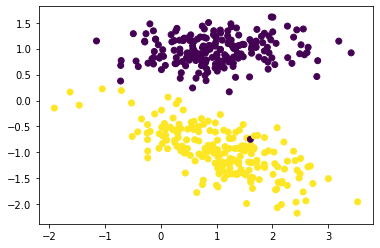

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

## Loss Function / Hinge Loss

$ L = \frac{1}{2}W^{T}W + c \sum_{i = 1}^{m}max(0, 1 - (y_{i}(W^TX^i + b)))$\
$ t_{i} = y_{i}(W^TX^i + b) $

## Updation Rule

$ W = W - \eta (W + C\begin{Bmatrix}
0  & if & t_{i} \geq 1\\
-1 & if & t_{i} < 1
\end{Bmatrix}   y_{i}x_{i} )$

$ bias = bias - \eta (0 + C\begin{Bmatrix}
0  & if & t_{i} \geq 1\\
-1 & if & t_{i} < 1
\end{Bmatrix}   y_{i})$



In [6]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
        
        
    
    def HingeLoss(self, W, B, X, Y):
                
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T) #First Term
        
        m = X.shape[0]
        
        for i in range(m):
            
            ti = Y[i] * (np.dot(W, X[i].T) + B)
            
            loss += self.C * max(0, (1 - ti)) # 1 - ti is for outliers
        
        return loss
    
    
    
    
    def fit(self, X, Y, batch_size = 100, Lr = 0.001, MaxItr = 20):
        
        #Initialization
        features = X.shape[1]
        samples  = X.shape[0]
        c = self.C        
        W = np.zeros((1, features))
        bias = 0     
        losses = []
        
        
        for i in range(MaxItr):
            
            losses.append(*self.HingeLoss(W, bias, X, Y)[0]) # Loss gets recorded   
            
            random_ids = np.arange(samples)
            np.random.shuffle(random_ids)
            
            for batch_start in range(0, samples, batch_size):
                
               
                Gradient_W = 0.0 # Used to compute gradient term only
                Gradient_B = 0.0 # That is why it gets initialized by 0 everytime
                
                for j in range(batch_start, batch_start + batch_size):
                    
                    if j < samples:
                
                        # Dealing with Random Data
                        i = random_ids[j]

                        ti = Y[i] * (np.dot(W, X[i]) + bias)
                        
                        if ti > 1:
                            "All Good"
                            Gradient_W += 0
                            Gradient_B += 0
                       
                        else:
                            
                            Gradient_W += c*Y[i]*X[i]
                            Gradient_B += c*Y[i]

                # Gradient is computed. Now it is needed to update the W and B
                W = W - Lr * W + Lr * Gradient_W
                bias = bias + Lr * Gradient_B
            
        self.W = W 
        self.b = bias
        
        return W, bias, list(losses)
            
        

In [7]:
svm = SVM()
W, Bias, Loss_List = svm.fit(X, Y)

In [8]:
Loss_List

[400.0,
 250.8258795952911,
 121.18600639928896,
 70.12164134886768,
 52.52493787982789,
 44.35320528292597,
 39.26937518954046,
 35.66107192898686,
 32.813819109267044,
 30.566156594352048,
 28.689925000465323,
 27.13854095806798,
 25.795571858776444,
 24.71329602123794,
 23.751802714151783,
 22.9704500443759,
 22.309873685720223,
 21.752825658441363,
 21.32058638229225,
 20.947539748440047]

In [13]:
def PlotAll(X, Y, W, Bias):
    
    x1 = np.linspace(-2, 4, 10)
    x2 = -(x1 * W[0][0] + Bias)/W[0][1]
    
    plt.figure(figsize = (10, 20))
    plt.scatter(X[:, 0], X[:, 1], c = Y)
    plt.plot(x1, x2)

    plt.plot()
    

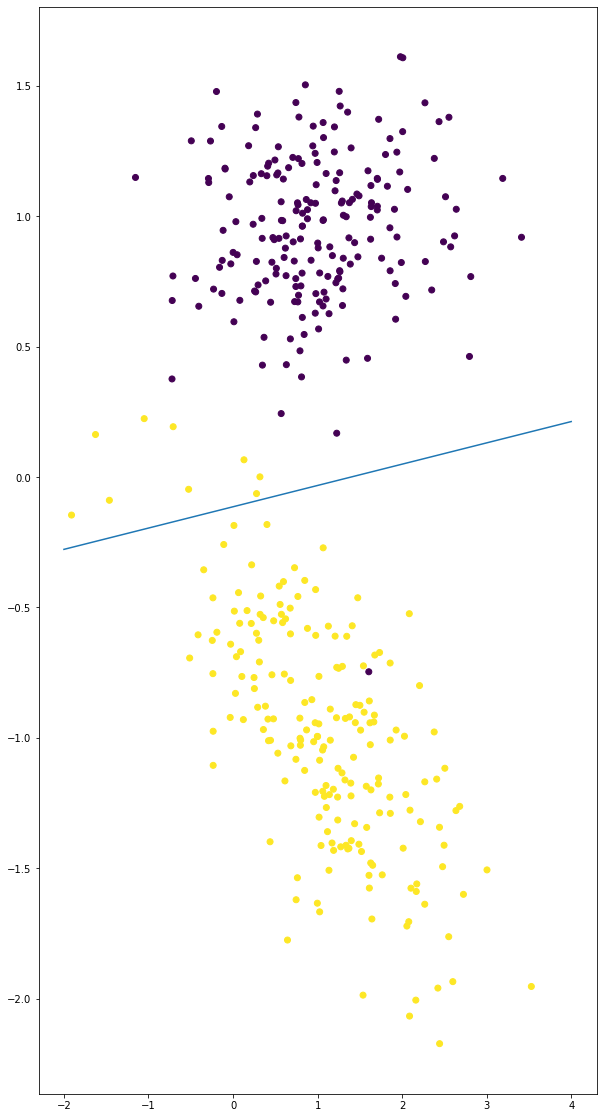

In [14]:
PlotAll(X, Y, W, Bias)


In [16]:
def PlotAllPlane(X, Y, W, Bias):
    
    x1 = np.linspace(-2, 4, 10)
    x2 = -(x1 * W[0][0] + Bias)/W[0][1]
    
    x_positive = -(x1 * W[0][0] + Bias + 1)/W[0][1]
    x_negative = -(x1 * W[0][0] + Bias - 1)/W[0][1]
    
    plt.figure(figsize = (10, 20))
    
    plt.scatter(X[:, 0], X[:, 1], c = Y)
    
    plt.plot(x1, x2)
    plt.plot(x1, x_positive)
    plt.plot(x1, x_negative)

    plt.plot()
    

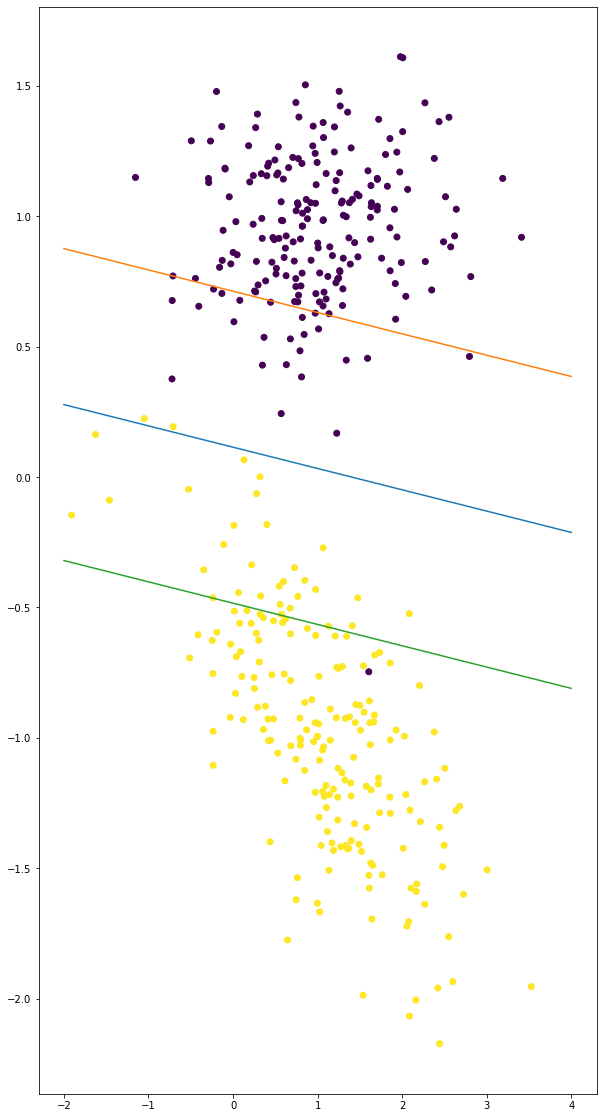

In [18]:
PlotAllPlane(X, Y, W, Bias)